In [1]:
import numpy as np
import matplotlib.pyplot as plt
import casadi
import itertools

Question 6 :

In [2]:
def h(x1, x2):
    return (x1*np.exp(-alpha*x1) + x2*np.exp(-alpha*x2))/(np.exp(-alpha*x1) + np.exp(-alpha*x2))

t0=6
tf=19
dt=0.25
N=int((tf-t0)/dt)
alpha=100
k=0.2
Tsat=70
Tin=50
C=100
Pm=3000
PN=0
E=[2*np.exp(-((t0+dt*i-13)**2)/9) for i in range(N+1)]
Q=np.zeros(N+1)
Q[int((12-6)/dt)]=3


opti = casadi.Opti();
x = opti.variable(2*N + 2)
x_init = np.zeros((2*N + 2,))
opti.set_initial(x, x_init)

P = x[:N + 1]
T = x[N + 1:]
f = 0
for i in range(N + 1):
    f+= h(E[i],dt*P[i])
opti.minimize(-f)

# Contraintes égalité
for i in range(N):
    opti.subject_to(T[i + 1] == np.exp(-k*dt)*T[i] + (1 - np.exp(-k*dt))/k*C*(-Q[i] + P[i]))

opti.subject_to(T[0] == Tin)
opti.subject_to(P[N] == 0)

# Contraintes inégalité
for i in range(N + 1):
    opti.subject_to(P[i] >= 0)
    opti.subject_to(P[i] <= Pm)
    opti.subject_to(T[i] >= 0)
    opti.subject_to(T[i] <= Tsat)


opti.solver('ipopt');
sol = opti.solve();
x_min = sol.value(x)

P_min = x_min[:N + 1]
T_min = x_min[N + 1:]


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      158
Number of nonzeros in inequality constraint Jacobian.:      212
Number of nonzeros in Lagrangian Hessian.............:       53

Total number of variables............................:      106
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

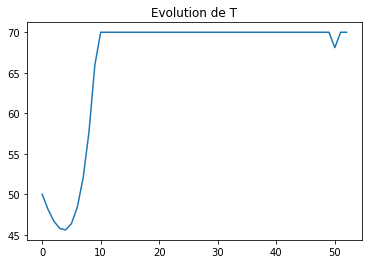

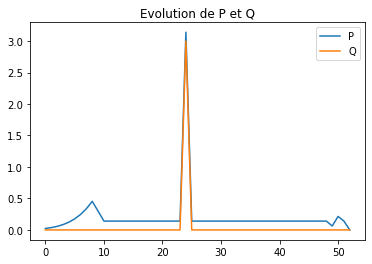

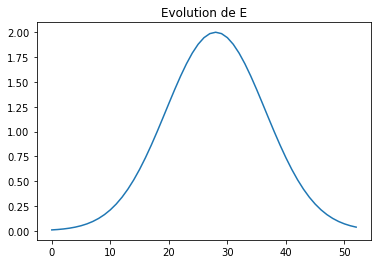

In [3]:
plt.plot(np.array(T_min))
plt.title("Evolution de T")
plt.show()

plt.plot(np.array(P_min))
plt.plot(Q)
plt.legend(["P","Q"])
plt.title("Evolution de P et Q")
plt.show()

plt.plot(E)
plt.title("Evolution de E")
plt.show()

Question 12 !

In [4]:
t0=6
tf=19
dt=0.25
N=int((tf-t0)/dt)
k=0.2
Tsat=70
Tin=50
C=100
Pm=3000
PN=0
E=[2*np.exp(-((t0+dt*i-13)**2)/9) for i in range(N+1)]
Q=np.zeros(N)
Q[int((12-6)/dt)]=3


opti = casadi.Opti();
x = opti.variable(3*N+3)
P = x[:N+1]
T = x[N+1:2*N+2]
S = x[2*N+2:]
f = 0
for i in range(N+1):
    f+= S[i]
opti.minimize(-f)

# Contraintes égalité
for i in range(N):
    opti.subject_to(T[i + 1] == np.exp(-k*dt)*T[i] + (1 - np.exp(-k*dt))/k*C*(-Q[i] + P[i]))

opti.subject_to(T[0] - Tin == 0)
opti.subject_to(P[N] == 0)

# Contraintes inégalité
for i in range(N + 1):
    opti.subject_to(P[i] >= 0)
    opti.subject_to(P[i] <= Pm)
    opti.subject_to(T[i] >= 0)
    opti.subject_to(T[i] <= Tsat)
    opti.subject_to(S[i] <= E[i])
    opti.subject_to(S[i] <= dt*P[i])


x_init = np.zeros((3*N + 3,))
opti.set_initial(x, x_init)

opti.solver('ipopt');
sol = opti.solve();
res = sol.value(x)

P_res = res[:N+1]
T_res = res[N+1:2*N+2]
S_res = res[2*N+2:]

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      158
Number of nonzeros in inequality constraint Jacobian.:      371
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      159
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       54
Total number of inequality constraints...............:      318
        inequality constraints with only lower bounds:      106
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      212

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

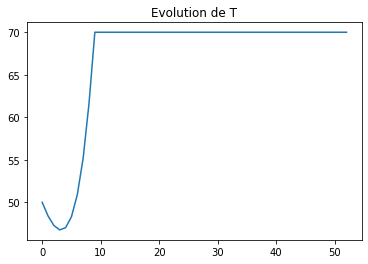

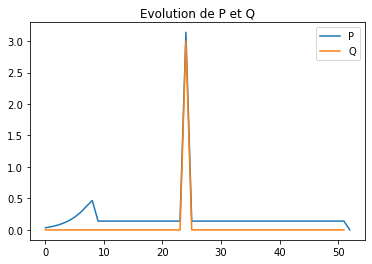

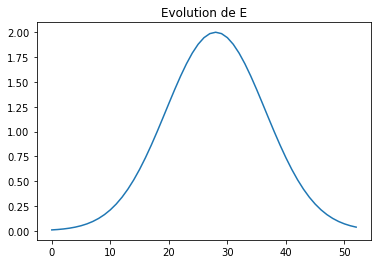

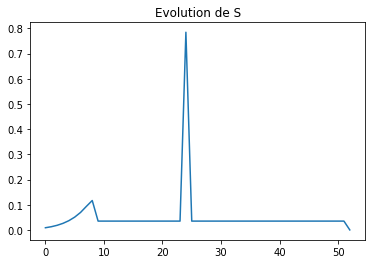

In [5]:
plt.plot(np.array(T_res))
plt.title("Evolution de T")
plt.show()

plt.plot(np.array(P_res))
plt.plot(Q)
plt.legend(["P","Q"])
plt.title("Evolution de P et Q")
plt.show()

plt.plot(E)
plt.title("Evolution de E")
plt.show()

plt.plot(np.array(S_res))
plt.title("Evolution de S")
plt.show()

Question 14 :

In [6]:
nl=6
pl=0.25

def PL(liste_depart): #T=[t0,t1, ... tk-1] les instants des départs de cycle
    L=np.zeros(N+1)
    for i in liste_depart: #pour chaque cycle
        L[i:i+nl]=[pl for j in range(nl)]
    return L

print (PL([3,15]))

def resol_pb(liste_depart): #T est la liste des départs de cycle, et la fonction résoud le pb d'optimisation correspondant
    opti = casadi.Opti();
    x = opti.variable(3*N+3)
    P = x[:N+1]
    T = x[N+1:2*N+2]
    S = x[2*N+2:]
    f = 0
    for i in range(N+1):
        f+= S[i]
    opti.minimize(-f)
    # Contraintes égalité
    for i in range(N):
        opti.subject_to(T[i + 1] == np.exp(-k*dt)*T[i] + (1 - np.exp(-k*dt))/k*C*(-Q[i] + P[i] + PL(liste_depart)[i]))
    opti.subject_to(T[0] - Tin == 0)
    opti.subject_to(P[N] == 0)
    # Contraintes inégalité
    for i in range(N + 1):
        opti.subject_to(P[i] >= 0)
        opti.subject_to(P[i] <= Pm)
        opti.subject_to(T[i] >= 0)
        opti.subject_to(T[i] <= Tsat)
        opti.subject_to(S[i] <= E[i])
        opti.subject_to(S[i] <= dt*(P[i]+ PL(liste_depart)[i]))

    x_init = np.zeros((3*N + 3,))
    opti.set_initial(x, x_init)

    opti.solver('ipopt');
    sol = opti.solve();
    res = sol.value(x)

    P_res = res[:N+1]
    T_res = res[N+1:2*N+2]
    S_res = res[2*N+2:]
    """
    plt.plot(np.array(T_res))
    plt.title("Evolution de T")
    plt.show()
    plt.plot(np.array(P_res))
    plt.plot(np.array(PL(liste_depart)))
    plt.plot(Q)
    plt.legend(["P","Pl","Q"])
    plt.title("Evolution de P et Q")
    plt.show()
    plt.plot(E)
    plt.title("Evolution de E")
    plt.show()
    plt.plot(np.array(S_res))
    plt.title("Evolution de S")
    plt.show()
    """

    return P_res,T_res,S_res

resol_pb([3,15])


[0.   0.   0.   0.25 0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.   0.
 0.   0.25 0.25 0.25 0.25 0.25 0.25 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      158
Number of nonzeros in inequality constraint Jacobian.:      371
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      159
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       54
Total number of inequality constraints...............:      318
        inequali

(array([3.45618961e-02, 5.06376983e-02, 7.31675439e-02, 2.24286708e-09,
        1.64577604e-09, 1.07780797e-09, 2.75732902e-02, 3.75666421e-02,
        1.85491461e-07, 8.53085153e-08, 5.19380802e-08, 3.52735440e-08,
        2.52914677e-08, 1.86505962e-08, 1.39189498e-08, 1.03805333e-08,
        7.63756992e-09, 5.45138741e-09, 3.67010093e-09, 2.19245139e-09,
        9.48335602e-10, 1.39999806e-01, 1.39999991e-01, 1.39999991e-01,
        3.13999999e+00, 1.39999991e-01, 1.39999991e-01, 1.39999991e-01,
        1.39999991e-01, 1.39999991e-01, 1.39999991e-01, 1.39999991e-01,
        1.39999991e-01, 1.39999991e-01, 1.39999991e-01, 1.39999991e-01,
        1.39999991e-01, 1.39999991e-01, 1.39999991e-01, 1.39999991e-01,
        1.39999991e-01, 1.39999991e-01, 1.39999991e-01, 1.39999991e-01,
        1.39999991e-01, 1.39999991e-01, 1.39999991e-01, 1.39999991e-01,
        1.39999991e-01, 1.39999991e-01, 1.39999991e-01, 1.40000187e-01,
        0.00000000e+00]),
 array([50.        , 48.40427301, 47.2

In [7]:
def f(S):
    a=0
    for i in range(N+1):
        a+= S[i]
    return a

def liste_possibilites_departs(N,nl):
    L=[]
    #on peut en placer au maximum (N+1)/nl
    kmax=int((N+1)/nl)
    for k in range(kmax+1):
        for A in itertools.combinations(list(range(N+1)),k):
            L.append(list(A))
    print(L)
    #L contient toutes les manières de placer des points dan un ensemble de N points
    #maintenant on va garder uniquement celles où les départs son éloignés de plus de nl
    result=[]
    for A in L:
        bool=True
        for i in range(len(A)-1):
            if A[i+1]-A[i]<nl:
                bool=False
        if A and A[-1]>N+1-nl:
            bool=False
        if bool==True:
            result.append(A)
    print(result)
    return result

In [11]:
liste_possibilites_departs(N,nl)

In [ ]:
def find_min():
    P_min,T_min,S_min=resol_pb([])
    liste_depart=[]
    liste_possible=liste_possibilites_departs(N,nl)
    for L in liste_possible:
        P,T,S=resol_pb(L)
        if f(S)>f(S_min):
            P_min,T_min,S_min=P,T,S
            liste_depart=L

    plt.plot(np.array(T_res))
    plt.title("Evolution de T")
    plt.show()
    plt.plot(np.array(P_res))
    plt.plot(np.array(PL(liste_depart)))
    plt.plot(Q)
    plt.legend(["P","Pl","Q"])
    plt.title("Evolution de P et Q")
    plt.show()
    plt.plot(E)
    plt.title("Evolution de E")
    plt.show()
    plt.plot(np.array(S_res))
    plt.title("Evolution de S")
    plt.show()
    return P_min,T_min,S_min,liste_depart

In [ ]:
find_min()

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      158
Number of nonzeros in inequality constraint Jacobian.:      371
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      159
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       54
Total number of inequality constraints...............:      318
        inequality constraints with only lower bounds:      106
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      212

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -